## <span style="font-size: 24pt; color: goldenrod; font-weight:bold">Negative Binomial Distribution</span>

### Overview:
The Negative Binomial distribution is a <span style="font-size: 11pt; color: steelblue; font-weight:bold">discrete probability distribution</span> that <u>models the number of independent and identically distributed Bernoulli trials required to achieve a specified number of successes</u>. It is used to describe the number of failures that occur before a certain number of successes is reached in a sequence of **i.i.d** Bernoulli trials.

- Specifically, negative binomial distribution answers the question, <span style="font-size: 11pt; color: goldenrod; font-weight:bold">"How many failures will occur before we achieve a desired number of successes?"</span>

### Important Properties:

<span style="font-size: 11pt; color: steelblue; font-weight:bold">Probability Mass Function (PMF)</span>:  

$$ P(X = k) = \binom{k+r-1}{k} \cdot p^r \cdot (1-p)^k $$

Where:
- $P(X = k)$ is the probability of having exactly $k$ failures before achieving $r$ successes.
- $k$ is the number of failures before $r$ number of success reached.
- $r$ is the number of successes required.
- $p$ is the probability of success in a single Bernoulli trial.
- $\binom{n}{k}$ represents the binomial coefficient, which calculates the number of combinations of $n$ items taken $k$ at a time.

<span style="font-size: 11pt; color: steelblue; font-weight:bold">Cumulative Distribution Function (CDF)</span>:  

$$F(x) = P(X \leq x) = 1 - (1 - p)^x $$

<span style="font-size: 11pt; color: steelblue; font-weight:bold">Expected Value (Mean)</span>: $$\mu=\frac{r}{p}$$

<span style="font-size: 11pt; color: steelblue; font-weight:bold">Mode</span>: $$\begin{cases}\left\lfloor {\frac {(r-1)(1-p)}{p}}\right\rfloor &{\text{if }}r>1\\0&{\text{if }}r\leq 1\end{cases}$$

<span style="font-size: 11pt; color: steelblue; font-weight:bold">Variance</span>: $$\sigma^2 = \frac{r \cdot (1-p)}{p^2}$$

### Connection to Geometric Distribution:
- The negative binomial distribution is related to the geometric distribution. The geometric distribution models the number of trials required to achieve the first success, while the negative binomial distribution models the number of trials required to achieve a specified number of successes.
- When $r = 1$, the negative binomial distribution simplifies to the geometric distribution.

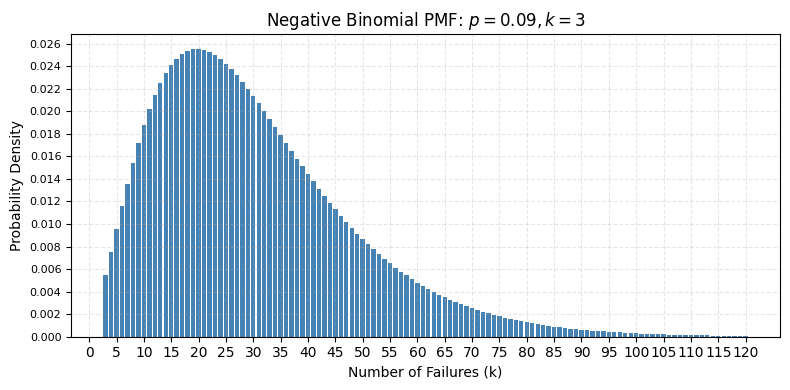

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def neg_binom(num_trials, num_success, prob_success):
    """
    Compute the Probability Mass Function (PMF) of the negative binomial distribution.
    
    Parameters:
        num_trials (array-like): An array of the number of trials.
        num_success (int): The number of successes required.
        prob_success (float): The probability of success in a single trial.
    
    Returns:
        pmf_values (array): The array of PMF values corresponding to the given number of trials.
    """
    import math
    
    # Initialize an array to store the PMF values
    comb = np.zeros(len(num_trials))
    
    # Calculate the PMF for each number of trials
    for idx, trials in enumerate(num_trials):
        comb[idx] = math.comb(trials + num_success - 1, trials) \
                    * prob_success**num_success                 \
                    * (1 - prob_success)**trials
        
    return comb

# Define the parameters of the negative binomial distribution
num_successes = 3
probability_of_success = 0.09

# Create an array of number of trials from 3 to 120
num_trials = np.arange(num_successes, 121)

# Calculate the PMF values using the neg_binom function
pmf_values = neg_binom(num_trials, num_successes, probability_of_success)

# Plot the PMF using matplotlib
plt.figure(figsize=(8, 4))
plt.bar(num_trials, pmf_values, color='steelblue')
plt.xlabel('Number of Failures (k)')
plt.xticks(np.arange(0, 124, 5))
plt.ylabel('Probability Density')
plt.yticks(np.arange(0, max(pmf_values) + 0.002, 0.002), size=8)
plt.title(f'Negative Binomial PMF: $p=0.09, k=3$')
plt.grid(True, ls='dashed', alpha=0.3)

plt.tight_layout()
plt.show()
